In [2]:
import os

if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py


Saved under thinkdsp.py


# Упражнение 2.1

Прочитать пояснения и выполнить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap02.ipynb

По представленной ссылке была изучена работа примеров.

# Упражнение 2.2

Упражнение 2.2
Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.

Напишите класс, называемые SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным


Класс SawtoothSignal, генерирующий пилообразный сигнал описан ниже.

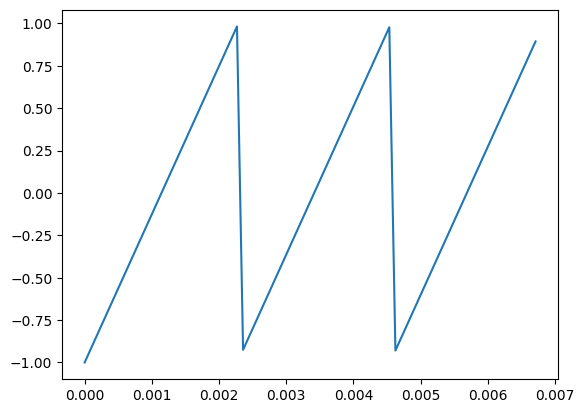

In [3]:
from thinkdsp import Sinusoid
from thinkdsp import unbias, normalize
import numpy as np

class SawtoothSignal(Sinusoid):
  
  def evaluate(self, ts):
    cycles = self.freq * ts + self.offset / np.pi / 2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

sawtooth_signal = SawtoothSignal()
sawtooth_signal.plot()

Расчитаем его спектр.

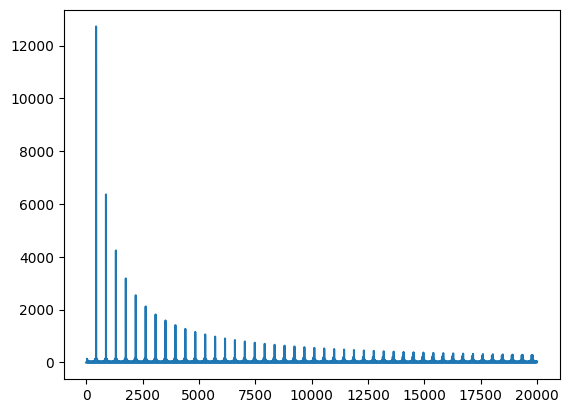

In [4]:
sawtooth_wave = sawtooth_signal.make_wave(duration=1, framerate=40000)
sawtooth_wave.make_spectrum().plot()

Для сравнения воспользуемся готовыми классами SquareSignal и TriangleSignal и построим прямоугольный и треугольные сигналы и их спектры соответственно и сравним их с полученным выше спектром нашего пилообразного сигнала.

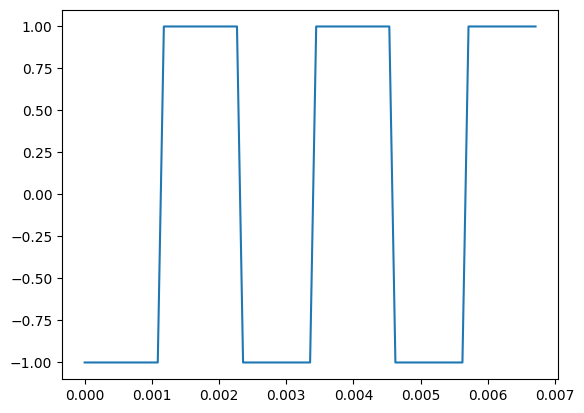

In [5]:
from thinkdsp import SquareSignal

square_signal = SquareSignal()
square_signal.plot()

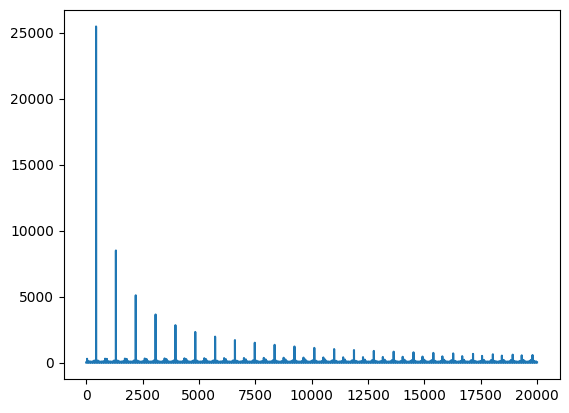

In [6]:
square_wave = square_signal.make_wave(duration=1, framerate=40000)
square_wave.make_spectrum().plot()

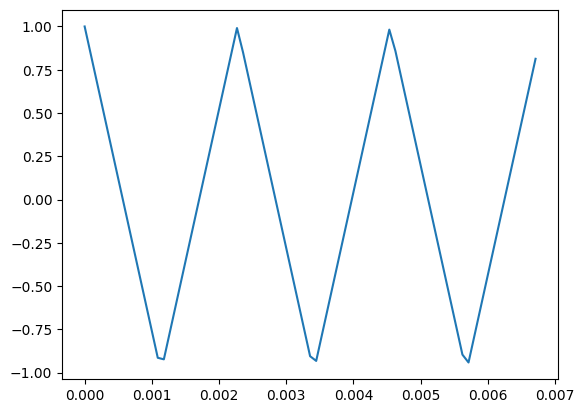

In [7]:
from thinkdsp import TriangleSignal

triangle_signal = TriangleSignal()
triangle_signal.plot()

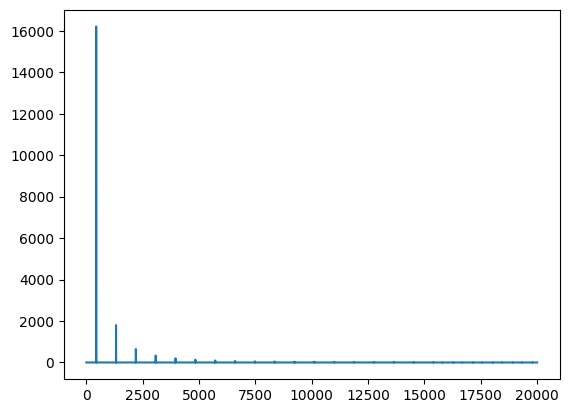

In [8]:
triangle_wave = triangle_signal.make_wave(duration=1, framerate=40000)
triangle_wave.make_spectrum().plot()

Сравнив спектры пилообразного и квадратного сигналов видим, что они затухают одинаково, но пилообразный сигнал включает в себя как чётные, так и нечётные гармоники.

Для треугольного сигнала не всё так схоже. Он затухает гораздо быстрее и каждая последующая гаромника затухает в соотношении к предыдущей как 
1/f^2, в то время как пилообразная затухает, как 1/f.

# Упражнение 2.3

Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

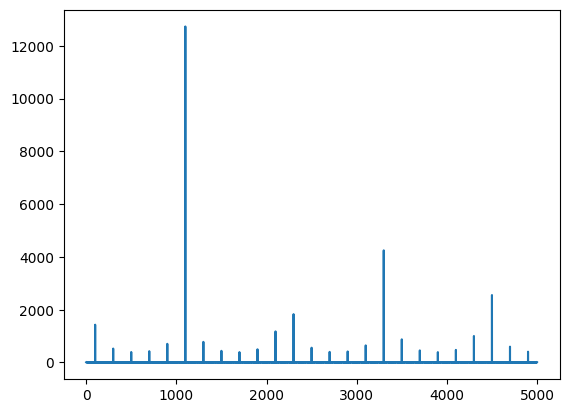

In [9]:
from thinkdsp import SquareSignal

square_signal = SquareSignal(freq=1100)
square_wave = square_signal.make_wave(duration = 2, framerate = 10000)
square_wave.make_spectrum().plot()

На спектре отчётливо видно основную частоту 1100 Гц, а также первую гармонику 3300 Гц, которые ожидаемо находятся на своих частотах. Однако третий пик уже находится не на 5500 Гц, а на 4500 Гц, четвёртый - на 2300 Гц, а не на 7700 Гц, пятый - на 100 Гц, а не на 9900 Гц. Как и было описано в задании, большинство гармоник "завёрнуты" из-за биений.

Если прослушать данный сигнал будет слышны последствия этого.

In [10]:
square_wave.make_audio()

# Упражнение 2.4

Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrum.hs[0] - амплитуда компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:

1. Созайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
2. Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуды и фаза этого компонента?
3. Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, высчитывающий wave, соответствующий Spectrum.

Создадим треугольный сигнал с заданной частотой.

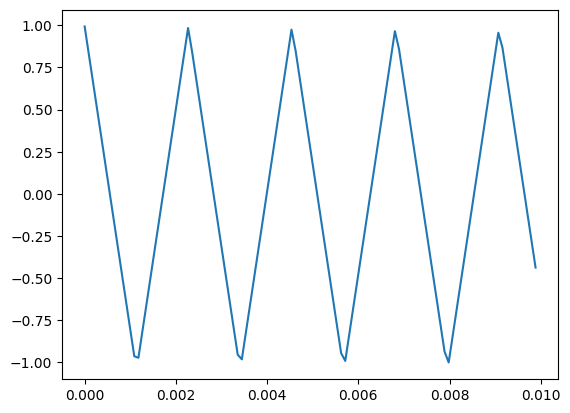

In [11]:
from thinkdsp import TriangleSignal

triangle_wave_1 = TriangleSignal(freq=440).make_wave(duration=0.01)
triangle_wave_1.plot()

In [12]:
triangle_spectrum = triangle_wave_1.make_spectrum()
[triangle_spectrum.fs[0], triangle_spectrum.hs[0]]

[0.0, (1.0436096431476471e-14+0j)]

В дейстительности, для компоненты с частотой 0 значенияе Spectrum.hs[0] близко к нулю (хоть это и комплексное число).

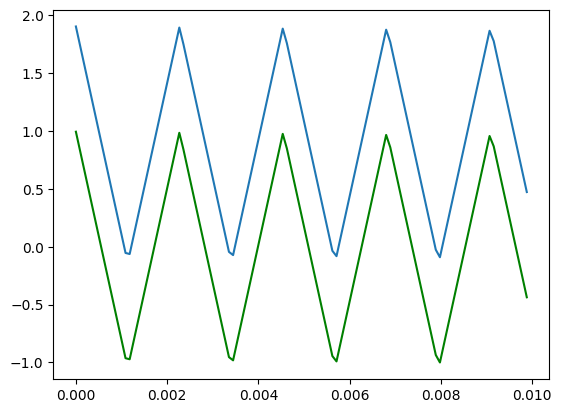

In [13]:
triangle_spectrum.hs[0] = 100
triangle_wave_2 = triangle_spectrum.make_wave()
triangle_wave_1.plot(color='green')
triangle_wave_2.plot()

Изменив компоненту нулевой частоты на 100, наблюдаем, что график сместился выше изначального. Можно предположить, что компонента нулевой частоты отвечает за смещение графика относительно положения, когда данная компонента ~= 0.

# Упражнение 2.5

Напишите функцию, принимающую Spectrum, как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: посколькую деление на ноль не определено, надо задать Spectrum.hs[0] = 0.

Проверьте функцию, используя прямоугольный, треугольный и пилообразный сигналы:

1. Вычислите Spectrum и распечатайте его.
2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
3. Используйте Spectrum.make_wave, чтобы сделать wave из изменённого Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?

Написанная функция представлена ниже. Сравним её работу на прямоугольном, треугольном и пилообразном сигналах.

In [14]:
from thinkdsp import SawtoothSignal, SquareSignal, TriangleSignal

def divide_spectrum(spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

In [15]:
triangle_wave_1 = TriangleSignal().make_wave(duration=1)
triangle_wave_1.make_audio()

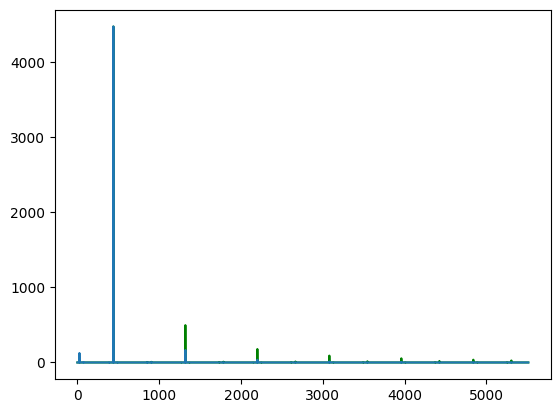

In [16]:
triangle_spectrum = triangle_wave_1.make_spectrum()
triangle_spectrum.plot(color='green')
divide_spectrum(triangle_spectrum)
triangle_spectrum.scale(440)
triangle_spectrum.plot()

In [17]:
triangle_wave_2 = triangle_spectrum.make_wave()
triangle_wave_2.make_audio()

In [18]:
square_wave_1 = SquareSignal().make_wave(duration=1)
square_wave_1.make_audio()

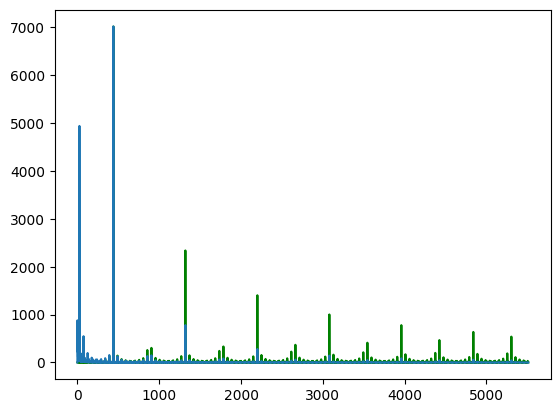

In [19]:
square_spectrum = square_wave_1.make_spectrum()
square_spectrum.plot(color='green')
divide_spectrum(square_spectrum)
square_spectrum.scale(440)
square_spectrum.plot()

In [20]:
square_wave_2 = square_spectrum.make_wave()
square_wave_2.make_audio()

In [21]:
sawtooth_wave_1 = SawtoothSignal().make_wave(duration=1)
sawtooth_wave_1.make_audio()

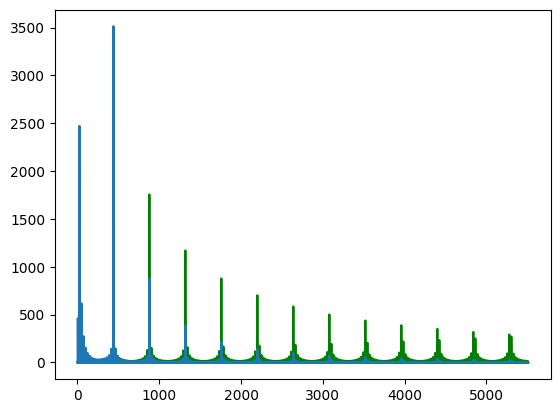

In [22]:
sawtooth_spectrum = sawtooth_wave_1.make_spectrum()
sawtooth_spectrum.plot(color='green')
divide_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(440)
sawtooth_spectrum.plot()


In [23]:
sawtooth_wave_2 = sawtooth_spectrum.make_wave()
sawtooth_wave_2.make_audio()

На каждом сравнении видно, что данная функция по сути сработала как функция фильтрации нижних частот. Если прослушать звуки, то слышно, что они стали ниже, а не спектре частот видно, что высокие частоты срезались.

# Упражнение 2.6

У треугольных и прямоугольных сигналов есть только нечетные гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f^2; гармоники треугольных сигналов - пропорционально 
. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально 1/f?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром, похожим на необходимый, и изменять его параметры.

Возьмём пилообразный сигнал, в котором уже имеются чётные и нечётные гармоники, и с помощью функции написанной в Упражнении 2.5 изменим уменьшение сигнала с пропорциональное 1/f на пропорциональное 1/f^2.

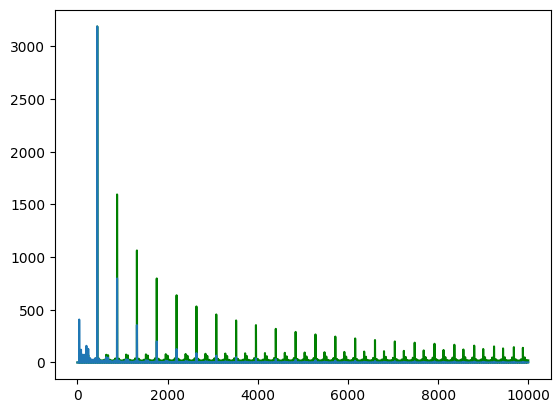

In [25]:
from thinkdsp import SawtoothSignal

start_wave = SawtoothSignal().make_wave(duration=0.5, framerate = 20000)
spectrum = start_wave.make_spectrum()
spectrum.plot(color='green')
divide_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot()